In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier,plot_tree,export_text
from sklearn.metrics import confusion_matrix,accuracy_score
from matplotlib.colors import ListedColormap

In [2]:
data = pd.read_csv("Social_Network_Ads.csv")
print(data.head())
data = data.sample(random_state=1, frac=1)
x = data.iloc[:, :-1].values
y = data.iloc[:,-1].values
x.shape, y.shape

   Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0


((400, 2), (400,))

In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.2, random_state=0)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((320, 2), (80, 2), (320,), (80,))

In [4]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train.shape, X_test.shape

((320, 2), (80, 2))

In [5]:
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [6]:
prediction = classifier.predict(X_test)
prediction

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0])

In [7]:
acc = accuracy_score(Y_test, prediction)
print(f"Model accuracy : {round(acc * 100, 2)}")

Model accuracy : 87.5


In [8]:
results = confusion_matrix(Y_test, prediction)
print(results)
tp,fp, tn, fn = results.flatten()
accuracy = (tp + tn)/ (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp/(tp + fn)
f1_score = (2* precision * recall)/ (precision + recall)
accuracy, precision, recall, f1_score

[[45  3]
 [ 7 25]]


(0.65, 0.9375, 0.6428571428571429, 0.7627118644067797)

In [9]:
importances = classifier.feature_importances_
indices = np.argsort(importances)[-20:]
for idx in indices:
    print(data.columns[idx], end=" ")
print()

EstimatedSalary Age 


In [10]:
r = export_text(classifier, feature_names=list(data.columns[:2]))
print(r)

|--- Age <= 0.44
|   |--- EstimatedSalary <= 0.62
|   |   |--- EstimatedSalary <= 0.18
|   |   |   |--- class: 0
|   |   |--- EstimatedSalary >  0.18
|   |   |   |--- Age <= -0.13
|   |   |   |   |--- class: 0
|   |   |   |--- Age >  -0.13
|   |   |   |   |--- EstimatedSalary <= 0.45
|   |   |   |   |   |--- Age <= 0.16
|   |   |   |   |   |   |--- EstimatedSalary <= 0.33
|   |   |   |   |   |   |   |--- EstimatedSalary <= 0.22
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- EstimatedSalary >  0.22
|   |   |   |   |   |   |   |   |--- Age <= 0.01
|   |   |   |   |   |   |   |   |   |--- EstimatedSalary <= 0.27
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- EstimatedSalary >  0.27
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- Age >  0.01
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- EstimatedSalary >  0.33
|   |   |   |   |   |   | 

[Text(0.3673780487804878, 0.9545454545454546, 'x[0] <= 0.44\nentropy = 0.931\nsamples = 320\nvalue = [209, 111]'),
 Text(0.18292682926829268, 0.8636363636363636, 'x[1] <= 0.624\nentropy = 0.58\nsamples = 224\nvalue = [193, 31]'),
 Text(0.07317073170731707, 0.7727272727272727, 'x[1] <= 0.178\nentropy = 0.148\nsamples = 189\nvalue = [185, 4]'),
 Text(0.04878048780487805, 0.6818181818181818, 'entropy = 0.0\nsamples = 138\nvalue = [138, 0]'),
 Text(0.0975609756097561, 0.6818181818181818, 'x[0] <= -0.128\nentropy = 0.397\nsamples = 51\nvalue = [47, 4]'),
 Text(0.07317073170731707, 0.5909090909090909, 'entropy = 0.0\nsamples = 35\nvalue = [35, 0]'),
 Text(0.12195121951219512, 0.5909090909090909, 'x[1] <= 0.445\nentropy = 0.811\nsamples = 16\nvalue = [12, 4]'),
 Text(0.0975609756097561, 0.5, 'x[0] <= 0.156\nentropy = 0.722\nsamples = 15\nvalue = [12, 3]'),
 Text(0.07317073170731707, 0.4090909090909091, 'x[1] <= 0.326\nentropy = 0.954\nsamples = 8\nvalue = [5, 3]'),
 Text(0.04878048780487805, 

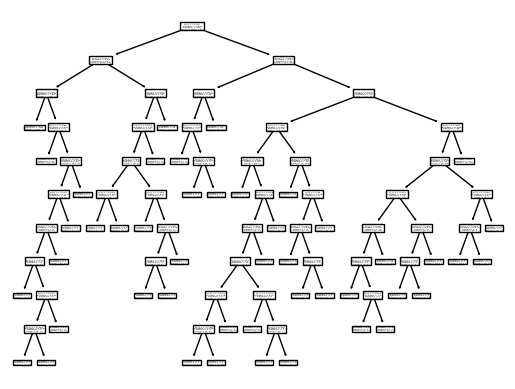

In [11]:
plot_tree(classifier)

/var/folders/n0/t0xmx3v5667556mxspdfh6d40000gn/T/ipykernel_18046/1915903717.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(['red', 'green'])(i), label = j)


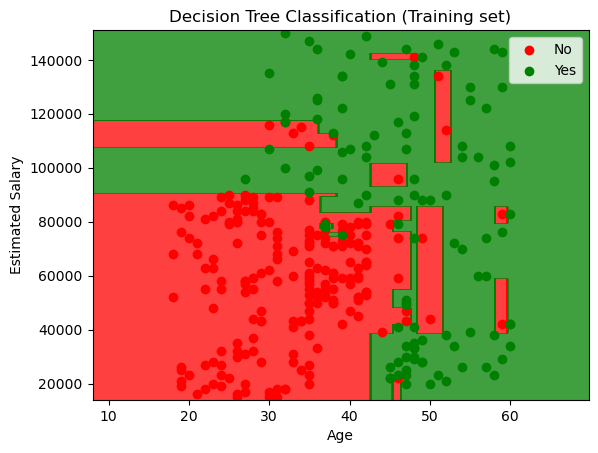

In [12]:
X_set, y_set = sc.inverse_transform(X_train), Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(['red', 'green']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(['red', 'green'])(i), label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend(["No", "Yes"])
plt.show()

/var/folders/n0/t0xmx3v5667556mxspdfh6d40000gn/T/ipykernel_18046/1523907828.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(['red', 'green'])(i), label = j)


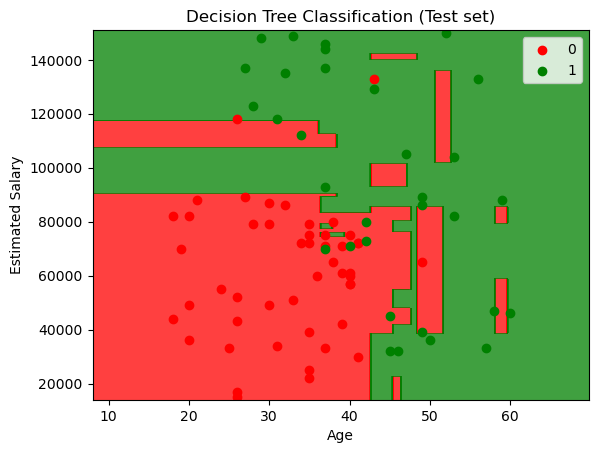

In [13]:
X_set, y_set = sc.inverse_transform(X_test), Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(['red', 'green']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(['red', 'green'])(i), label = j)
plt.title('Decision Tree Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()